In [101]:
#Task 1
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [102]:
data=pd.read_csv('./housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [103]:
x=data['total_rooms'].values.reshape(-1,1)
y=data['median_house_value'].values

In [104]:
x.shape,y.shape

((20640, 1), (20640,))

In [105]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [106]:
clf=LinearRegression()
clf.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [107]:
ypred=clf.predict(x_test)

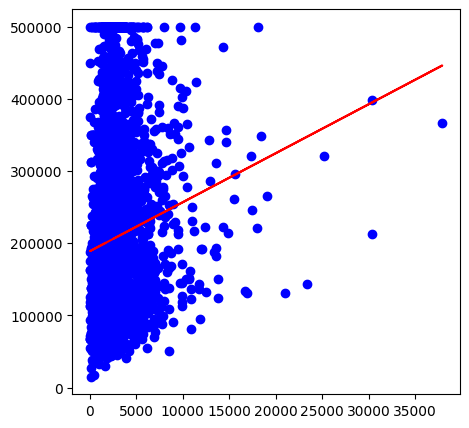

In [108]:
plt.figure(figsize=(5,5))
plt.scatter(x_test,y_test,c='b')
plt.plot(x_test,ypred,c='r')
plt.show()

In [109]:
mse=np.mean((y_test-ypred)**2)
mse

12847621759.46433

In [110]:
#task 2

In [111]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [112]:
data=data.fillna(data['total_bedrooms'].mean())

In [113]:
drop=['median_house_value','ocean_proximity','total_bedrooms']
x=data.drop(columns=drop).values
y=data['median_house_value'].values

In [114]:
x.shape,y.shape

((20640, 7), (20640,))

In [115]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [116]:
clf=LinearRegression()
clf.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [117]:
ypred=clf.predict(x_test)

In [118]:
r2=r2_score(y_test,ypred)
r2

0.620518099741852

In [119]:
mse=np.mean((y_test-ypred)**2)
mse

4972764891.781946

In [120]:
rmse = np.sqrt(mse)
rmse

70517.83385628025

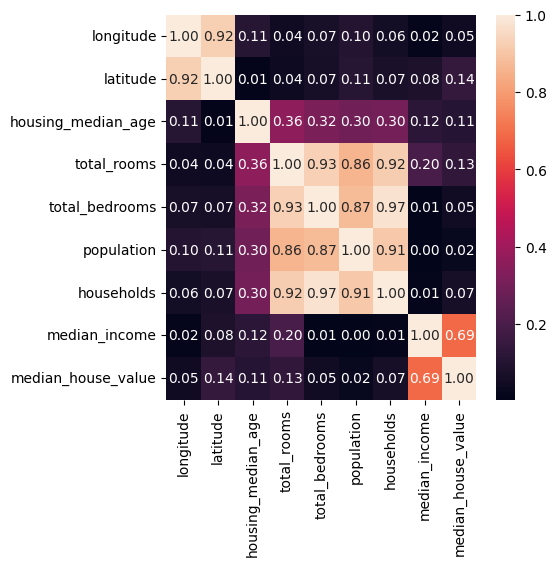

In [143]:
plt.figure(figsize=(5,5))
sns.heatmap(data.drop(columns=['ocean_proximity']).corr().abs(),annot=True,fmt='.2f')
plt.show()

In [122]:
#Task 3--------

In [123]:
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [124]:
clf=LinearRegression()
clf.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [125]:
ypred=clf.predict(x_test)

In [126]:
r2_after=r2_score(y_test,ypred)
r2_after

0.6205180997418556

In [127]:
mse_after=np.mean((y_test-ypred)**2)
mse_after

4972764891.781902

In [128]:
rmse_after = np.sqrt(mse)
rmse_after

70517.83385628025

In [136]:
compare=pd.DataFrame([['r2',r2,r2_after],['mse',mse,mse_after],['rmse',rmse,rmse_after]],columns=['value','before scaling','after scaling'])
compare

,value,before scaling,after scaling
0,r2,6.205181e-01,6.205181e-01
1,mse,4.972765e+09,4.972765e+09
2,rmse,7.051783e+04,7.051783e+04


In [139]:
#Task 4

In [142]:
matrix=data.drop(columns=['ocean_proximity']).corr()
matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


<Axes: >

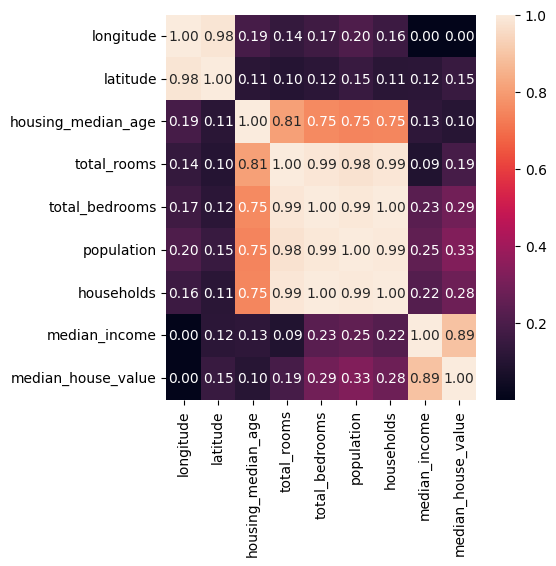

In [144]:
plt.figure(figsize=(5,5))
sns.heatmap(matrix.corr().abs(),annot=True,fmt='.2f')

In [146]:
corr=matrix['median_house_value'].drop('median_house_value').abs()
strongest_corr = corr.sort_values(ascending=False)
strongest_corr

median_income         0.688075
latitude              0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
longitude             0.045967
population            0.024650
Name: median_house_value, dtype: float64